In [1]:
import pyodbc
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
# from keras.utils.vis_utils import plot_model
# from tensorflow.python.keras.utils.vis_utils import plot_model
# from tensorflow.keras.utils import plot_model
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from tensorflow.keras import layers
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
class DBConnector:
    def __init__(self, server_name, username, password, db_name, connection_str):
        self.sever_name = server_name
        self.username = username
        self.password = password
        self.db_name = db_name
        self.connection_str = connection_str
        self.connection = pyodbc.connect(self.connection_str)

    def test_connection(self):
        try:
            db = self.connection
            cursor = db.cursor()
            cursor.execute("SELECT @@VERSION")
            results = cursor.fetchone()
            # Check if anything at all is returned
            if results:
                return True
            else:
                return False
        except pyodbc.Error as ex:
            print(ex)
            print("Error in connection!")
            sqlstate = ex.args[0]
            if sqlstate == '28000':
                print("LDAP Connection failed: check password")
        return False

    def query(self, query_str):
        """This function returns a dataframe of result list"""
        return pd.read_sql_query(query_str, self.connection)

    def all_columns_name(self, table_name):
        """This function returns a dataframe of result list"""
        query_str = f"select COLUMN_NAME from INFORMATION_SCHEMA.COLUMNS where TABLE_NAME='{table_name}'"
        print("All columns names: ", query_str)
        return pd.read_sql_query(query_str, self.connection)

driver="SQL Server"
servername = 'QUOC-CUONG'
username = 'sa'
password = 'cuong300599'
db_name = 'OnlinePhoneShop'

str_for_connection = "Driver={driver};Server={servername};UID={username};PWD={password};Database={db_name};"\
    .format(driver=driver, servername=servername, username=username, password=password, db_name=db_name)

connector = DBConnector(servername, username, password, db_name, str_for_connection)

In [3]:
query_str = "select product_id, product_name, unit_price, label from dbo.products"

label2type={0:"Phụ kiện", 1: "Gaming/ Cấu hình cao", 2:"Giải trí thông thường", 3:"Chỉ nghe và gọi"}
df_products = connector.query(query_str)

df_products["dedicated"] = df_products["label"].map(label2type)
df_products.head(20)

,product_id,product_name,unit_price,label,dedicated
0,PD041020210001,Điện Thoại Samsung Galaxy A12 (4GB/128GB) - ĐÃ...,3.990000e+06,2,Giải trí thông thường
1,PD041020210002,Tai nghe Bluetooth AirPods Pro Wireless Charge...,6.790000e+06,0,Phụ kiện
2,PD041020210003,Điện Thoại Vsmart Joy 4 - Hàng Chính Hãng,3.059000e+06,2,Giải trí thông thường
3,PD041020210004,Tai nghe Bluetooth True Wireless Galaxy Buds P...,3.992000e+06,0,Phụ kiện
4,PD041020210005,Vivo y12,1.000000e+07,2,Giải trí thông thường
5,PD081020210006,Móc dán điện thoại OSMIA RingCK039 Cún Trắng,4.999999e+04,0,Phụ kiện
6,PD081020210007,Máy Tính Bảng HUAWEI MatePad T 10 | Hiệu Suất ...,3.790000e+06,1,Gaming/ Cấu hình cao
7,PD111120210001,Điện Thoại OnePlus Nord CE 5G (12GB/256G) - Hà...,7.990000e+06,1,Gaming/ Cấu hình cao
8,PD111120210057,iPad Pro M1 12.9 inch (2021) 256GB Wifi - Hàng...,3.499000e+07,1,Gaming/ Cấu hình cao
9,PD151020210001,Điện Thoại iPhone 12 Pro Max 128GB - Hàng Chín...,3.099000e+07,1,Gaming/ Cấu hình cao


In [4]:
query_str = "select user_id, product_id, score from dbo.ratings"
df_ratings = connector.query(query_str)

# Save to csv file
# df_users_products_ratings_pivotted.to_csv(r'D:\PhoneShopML\data\rating_matrix.csv', header=True, index=True, encoding='utf-8-sig')

print("Number of ratings: ", df_ratings.shape[0])
df_ratings.head(20)

Number of ratings:  310


,user_id,product_id,score
0,US041020210001,PD041020210001,4.0
1,US071020210001,PD041020210001,2.5
2,US281020210001,PD041020210001,1.0
3,US281020210042,PD041020210001,1.5
4,US281020210048,PD041020210001,1.5
5,US281020210053,PD041020210001,2.0
6,US281020210069,PD041020210001,5.0
7,US281020210070,PD041020210001,5.0
8,US041020210001,PD041020210002,2.5
9,US191020210007,PD041020210002,2.5


In [5]:
user_ids = df_ratings['user_id'].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
# print("User to user encode: \n", user2user_encoded)
# print("User encode to user: \n", userencoded2user)

product_ids = df_ratings["product_id"].unique().tolist()
# print("Unique products have been rated: ", len(product_ids))
product2product_encoded = {x: i for i, x in enumerate(product_ids)}
product_encoded2product = {i: x for i, x in enumerate(product_ids)}
# print("Product to product encode: \n", product2product_encoded)
# print("Product encode to product: \n", product_encoded2product)

df_ratings["user"] = df_ratings["user_id"].map(user2user_encoded)
df_ratings["product"] = df_ratings["product_id"].map(product2product_encoded)
df_ratings.head(20)

,user_id,product_id,score,user,product
0,US041020210001,PD041020210001,4.0,0,0
1,US071020210001,PD041020210001,2.5,1,0
2,US281020210001,PD041020210001,1.0,2,0
3,US281020210042,PD041020210001,1.5,3,0
4,US281020210048,PD041020210001,1.5,4,0
5,US281020210053,PD041020210001,2.0,5,0
6,US281020210069,PD041020210001,5.0,6,0
7,US281020210070,PD041020210001,5.0,7,0
8,US041020210001,PD041020210002,2.5,0,1
9,US191020210007,PD041020210002,2.5,8,1


In [6]:
num_users = len(user2user_encoded)
num_products = len(product_encoded2product)

# min and max ratings will be used to normalize the ratings later
min_rating = min(df_ratings['score'])
max_rating = max(df_ratings['score'])

print(f"Number of users having rating: {num_users}, Number of rated products: {num_products}, Min rating: {min_rating}, Max rating: {max_rating}")

Number of users having rating: 67, Number of rated products: 59, Min rating: 1.0, Max rating: 5.0


# Prepare training and validation data

In [7]:
df_ratings= df_ratings.sample(frac=1, random_state=42)
x = df_ratings[["user", "product"]].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = df_ratings["score"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * df_ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

# Build model

In [8]:
EMBEDDING_SIZE = 50

class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_products, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_products = num_products
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
            name="user_embed"
        )
        self.user_bias = layers.Embedding(num_users, 1, name="user_bias")
        
        self.product_embedding = layers.Embedding(
            num_products,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
            name="product_embed"
        )
        self.product_bias = layers.Embedding(num_products, 1, name="product_bias")

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        product_vector = self.product_embedding(inputs[:, 1])
        product_bias = self.product_bias(inputs[:, 1])
        dot_user_product = tf.tensordot(user_vector, product_vector, 2)
        # Add all the components (including bias)
        x = dot_user_product + user_bias + product_bias
        # The sigmoid activation forces the rating to between 0 and 1
        
        return tf.nn.sigmoid(x)

model = RecommenderNet(num_users, num_products, EMBEDDING_SIZE)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(lr=0.001)
)

c:\users\quoc cuong\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Train the model based on the data split

In [9]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=20,
    verbose=1,
    validation_data=(x_val, y_val),
)

Epoch 1/20
5/5 [==============================] - 1s 108ms/step - loss: 0.8263 - val_loss: 0.7872
Epoch 2/20
5/5 [==============================] - 0s 46ms/step - loss: 0.9091 - val_loss: 0.7871
Epoch 3/20
5/5 [==============================] - 0s 66ms/step - loss: 0.8473 - val_loss: 0.7880
Epoch 4/20
5/5 [==============================] - 0s 51ms/step - loss: 0.9185 - val_loss: 0.7874
Epoch 5/20
5/5 [==============================] - 0s 9ms/step - loss: 0.8676 - val_loss: 0.7879
Epoch 6/20
5/5 [==============================] - 0s 8ms/step - loss: 1.0680 - val_loss: 0.7888
Epoch 7/20
5/5 [==============================] - 0s 8ms/step - loss: 0.8962 - val_loss: 0.7901
Epoch 8/20
5/5 [==============================] - 0s 8ms/step - loss: 0.9659 - val_loss: 0.7921
Epoch 9/20
5/5 [==============================] - 0s 8ms/step - loss: 0.7984 - val_loss: 0.7928
Epoch 10/20
5/5 [==============================] - 0s 8ms/step - loss: 1.1260 - val_loss: 0.7952
Epoch 11/20
5/5 [=================

# Plot history and validation loss

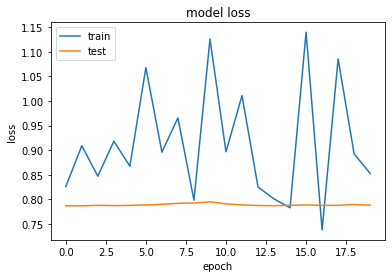

In [10]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# Model Summary

In [11]:
model.summary()
tf.keras.utils.plot_model(model, to_file='CF_DeepLearning_Model.png', show_shapes=True, show_layer_names=True)

Model: "recommender_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 user_embed (Embedding)      multiple                  3350      
                                                                 
 user_bias (Embedding)       multiple                  67        
                                                                 
 product_embed (Embedding)   multiple                  2950      
                                                                 
 product_bias (Embedding)    multiple                  59        
                                                                 
Total params: 6,426
Trainable params: 6,426
Non-trainable params: 0
_________________________________________________________________
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


# Show top 10 product recommendations to a user

In [12]:
# user_id = df_ratings.user_id.sample(1).iloc[0]
user_id  = 'US281020210062'
print("Showing recommendations for user: {}".format(user_id))
products_rated_by_user = df_ratings[df_ratings.user_id == user_id]
products_not_rated = df_products[
    ~df_products["product_id"].isin(products_rated_by_user.product_id.values)]["product_id"]

products_not_rated = list(set(products_not_rated).intersection(set(product2product_encoded.keys())))
products_not_rated = [[product2product_encoded.get(x)] for x in products_not_rated]

user_encoder = user2user_encoded.get(user_id)
user_product_array = np.hstack(
    ([[user_encoder]] * len(products_not_rated), products_not_rated)
)

ratings = model.predict(user_product_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_product_ids = [
    product_encoded2product.get(products_not_rated[x][0]) for x in top_ratings_indices
]

print("Top user's rating from the past:\n")
top_products_user = (
    products_rated_by_user.sort_values(by="score", ascending=False)
    .head(5)
    .product_id.values
)

cols = ['product_id', 'product_name', 'unit_price', 'dedicated']
history_rated_products = []
df_product_rows = df_products[df_products["product_id"].isin(top_products_user)]
for row in df_product_rows.itertuples():
    history_rated_products.append([row.product_id, row.product_name, row.unit_price,  row.dedicated])
    
df_history_rated_products = pd.DataFrame(history_rated_products, columns=cols)
df_history_rated_products.head()

Showing recommendations for user: US281020210062
Top user's rating from the past:



,product_id,product_name,unit_price,dedicated
0,PD041020210002,Tai nghe Bluetooth AirPods Pro Wireless Charge...,6790000.0,Phụ kiện
1,PD081020210007,Máy Tính Bảng HUAWEI MatePad T 10 | Hiệu Suất ...,3790000.0,Gaming/ Cấu hình cao
2,PD151020210001,Điện Thoại iPhone 12 Pro Max 128GB - Hàng Chín...,30990000.0,Gaming/ Cấu hình cao
3,PD161020210008,Tai Nghe Nhét Tai JBL C150SI - Hàng Chính Hãng,203000.0,Phụ kiện
4,PD271020210041,Điện thoại Realme C25s,4990000.0,Giải trí thông thường


In [13]:
prediction_values = []
for index in top_ratings_indices:
    prediction_values.append(ratings[index])
    
print("Top 10 product recommendations:\n")

recommended_products = df_products[df_products["product_id"].isin(recommended_product_ids)]
recommended_product_list = []
for row in recommended_products.itertuples():
     recommended_product_list.append([row.product_id, row.product_name, row.unit_price,  row.dedicated])
df_recommend_products = pd.DataFrame(recommended_product_list, columns=cols)
df_recommend_products['prediction_probability'] = prediction_values
df_recommend_products.head(10)

Top 10 product recommendations:



,product_id,product_name,unit_price,dedicated,prediction_probability
0,PD081020210006,Móc dán điện thoại OSMIA RingCK039 Cún Trắng,4.999999e+04,Phụ kiện,0.759882
1,PD191020210012,Ốp lưng dẻo trong suốt TPU loại tốt dành cho S...,1.200000e+04,Phụ kiện,0.756758
2,PD191020210013,Máy tính bảng Samsung Galaxy Tab A7 Lite LTE S...,4.690000e+06,Giải trí thông thường,0.755482
3,PD271020210016,Điện Thoại Samsung A52S 5G 8GB/128GB - Hàng Ch...,1.099000e+07,Gaming/ Cấu hình cao,0.753529
4,PD271020210021,Điện Thoại iPhone 12 Pro 256GB - Hàng Chính Hãng,2.750000e+07,Gaming/ Cấu hình cao,0.750880
5,PD271020210024,Điện Thoại Samsung Galaxy S21 Plus 5G (8GB/128...,2.099000e+07,Gaming/ Cấu hình cao,0.749930
6,PD271020210025,Điện thoại Vivo X70 Pro 5G (12GB/256GB) - Hàng...,1.775000e+07,Gaming/ Cấu hình cao,0.749088
7,PD271020210031,Điện thoại Vivo V20 (2021),7.790000e+06,Gaming/ Cấu hình cao,0.748588
8,PD271020210032,Điện Thoại Realme C21Y 4GB - Hàng Chính Hãng,3.390000e+06,Giải trí thông thường,0.748458
9,PD271020210034,Điện thoại Realme C11 (2021),2.790000e+06,Giải trí thông thường,0.746540
